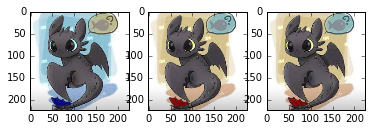

In [299]:
import matplotlib.pyplot as plt
%matplotlib inline

import cv2

img = cv2.imread('./data/toothless.jpg')
###
# OpenCV uses BGR as its default colour order for images, matplotlib uses RGB. 
# When you display an image loaded with OpenCv in matplotlib the channels will be back to front.
# The easiest way of fixing this is to use OpenCV to explicitly convert it back to RGB
###
plt.subplot(1,3,1)
plt.imshow(img)

img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.subplot(1,3,2)
plt.imshow(img_bgr)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(1,3,3)
plt.imshow(img_rgb)

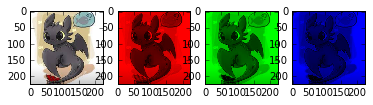

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline

import cv2

img = cv2.imread('./data/toothless.jpg')
###
# OpenCV uses BGR as its default colour order for images, matplotlib uses RGB. 
# When you display an image loaded with OpenCv in matplotlib the channels will be back to front.
# The easiest way of fixing this is to use OpenCV to explicitly convert it back to RGB
###
img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.subplot(1,4,1)
plt.imshow(img_bgr)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(1,4,2)
red = np.dstack((img_rgb[:,:,0], np.zeros_like(img_rgb[:,:,0]), np.zeros_like(img_rgb[:,:,0])))
plt.imshow(red)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(1,4,3)
green = np.dstack((np.zeros_like(img_rgb[:,:,0]), img_rgb[:,:,1], np.zeros_like(img_rgb[:,:,0])))
plt.imshow(green)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(1,4,4)
blue = np.dstack((np.zeros_like(img_rgb[:,:,0]), np.zeros_like(img_rgb[:,:,0]), img_rgb[:,:,2]))
plt.imshow(blue)

img.shape: (224, 225, 3)
img_gray.shape:  (224, 225)
img_gray3.shape:  (224, 225, 3)
img_colour.shape:  (224, 225, 3)


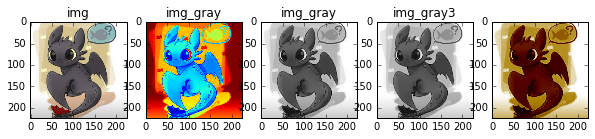

In [320]:
import matplotlib.pyplot as plt
%matplotlib inline

import cv2

# read image
img = cv2.imread('./data/toothless.jpg')
#img = cv2.imread('./data/rainbow-dress.jpg')

print('img.shape:', img.shape)
###
# OpenCV uses BGR as its default colour order for images, matplotlib uses RGB. 
# When you display an image loaded with OpenCv in matplotlib the channels will be back to front.
# The easiest way of fixing this is to use OpenCV to explicitly convert it back to RGB
###
# convert to BGR
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.subplot(1,5,1)
plt.imshow(img)
plt.title('img')

# convert to gray
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print('img_gray.shape: ', img_gray.shape)

# plot as it is
plt.subplot(1,5,2)
plt.imshow(img_gray)
plt.title('img_gray')

# plot with gray colormap
plt.subplot(1,5,3)
plt.imshow(img_gray, cmap='gray')
plt.title('img_gray')

# gray -> rgb
img_gray3 = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2RGB)
print('img_gray3.shape: ', img_gray3.shape)

plt.subplot(1,5,4)
plt.imshow(img_gray3)
plt.title('img_gray3')

# gray -> rgb -> colour
img_colour = np.array(cv2.applyColorMap(img_gray, cv2.COLORMAP_OCEAN))
             #np.array(cv2.applyColorMap(img_gray, cv2.COLORMAP_PINK)) 
             #np.array(cv2.applyColorMap(img_gray, cv2.COLORMAP_SUMMER))
        
print('img_colour.shape: ', img_colour.shape)
plt.subplot(1,5,5)
plt.imshow(img_colour)


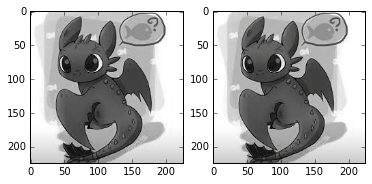

In [288]:
import numpy as np
img_color = np.zeros_like(img_gray3)
img_color[:,:,0] = np.floor((np.array(img_gray3[:,:,0]) - np.array(img_gray3[:,:,1]) * 0.6 - np.array(img_gray3[:,:,2]) * 0.1)/0.3 )
img_color[:,:,1] = np.floor((np.array(img_gray3[:,:,1]) - np.array(img_gray3[:,:,0]) * 0.3 - np.array(img_gray3[:,:,2]) * 0.1)/0.6 )
img_color[:,:,2] = np.floor((np.array(img_gray3[:,:,2]) - np.array(img_gray3[:,:,0]) * 0.3 - np.array(img_gray3[:,:,1]) * 0.6)/0.1 )

plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.subplot(1,2,2)
plt.imshow(img_color)

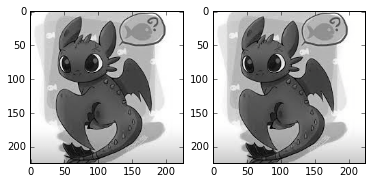

In [308]:
import numpy as np

# scaling factor for each channels
rs = 0.299
gs = 0.587
bs = 0.114

img_color = np.zeros_like(img_gray3)
img_color[:,:,0] = np.floor(np.clip(np.array(img_gray3[:,:,0]- np.array(img_gray3[:,:,1]) * gs - np.array(img_gray3[:,:,2]) * bs) * 1/rs, a_min=0, a_max=255))
img_color[:,:,1] = np.floor(np.clip(np.array(img_gray3[:,:,1]- np.array(img_gray3[:,:,0]) * rs - np.array(img_gray3[:,:,2]) * bs) * 1/gs, a_min=0, a_max=255))
img_color[:,:,2] = np.floor(np.clip(np.array(img_gray3[:,:,2]- np.array(img_gray3[:,:,0]) * rs - np.array(img_gray3[:,:,1]) * gs) * 1/bs, a_min=0, a_max=255))

plt.subplot(1,2,1)
plt.imshow(img_gray3)
plt.subplot(1,2,2)
plt.imshow(img_color)

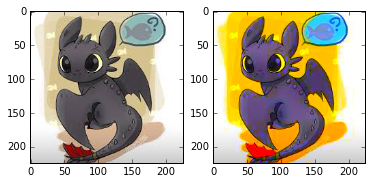

In [300]:
import numpy as np

# scaling factor for each channels
rs = 0.299
gs = 0.587
bs = 0.114

img_color = np.zeros_like(img_rgb)
img_color[:,:,0] = np.floor(np.clip((np.array(img_rgb[:,:,0]) - 
                                     np.array(img_rgb[:,:,1]) * gs - 
                                     np.array(img_rgb[:,:,2]) * bs) * 1/rs, a_min=0, a_max=255))

img_color[:,:,1] = np.floor(np.clip((np.array(img_rgb[:,:,1]) - 
                                     np.array(img_rgb[:,:,0]) * rs - 
                                     np.array(img_rgb[:,:,2]) * bs) * 1/gs, a_min=0, a_max=255))

img_color[:,:,2] = np.floor(np.clip((np.array(img_rgb[:,:,2]) - 
                                     np.array(img_rgb[:,:,0]) * rs - 
                                     np.array(img_rgb[:,:,1]) * gs) * 1/bs, a_min=0, a_max=255))

plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.subplot(1,2,2)
plt.imshow(img_color)

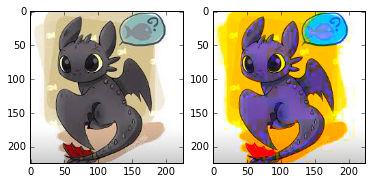

In [301]:
import numpy as np

# scaling factor for each channels
rs = 0.2126
gs = 0.7152
bs = 0.0722

img_color = np.zeros_like(img_rgb)
img_color[:,:,0] = np.floor(np.clip((np.array(img_rgb[:,:,0]) - 
                                     np.array(img_rgb[:,:,1]) * gs - 
                                     np.array(img_rgb[:,:,2]) * bs) * 1/rs, a_min=0, a_max=255))

img_color[:,:,1] = np.floor(np.clip((np.array(img_rgb[:,:,1]) - 
                                     np.array(img_rgb[:,:,0]) * rs - 
                                     np.array(img_rgb[:,:,2]) * bs) * 1/gs, a_min=0, a_max=255))

img_color[:,:,2] = np.floor(np.clip((np.array(img_rgb[:,:,2]) - 
                                     np.array(img_rgb[:,:,0]) * rs - 
                                     np.array(img_rgb[:,:,1]) * gs) * 1/bs, a_min=0, a_max=255))

plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.subplot(1,2,2)
plt.imshow(img_color)

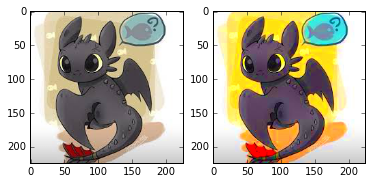

In [302]:
import numpy as np

# scaling factor for each channels
rs = 1/3
gs = 1/3
bs = 1/3

img_color = np.zeros_like(img_rgb)
img_color[:,:,0] = np.floor(np.clip((np.array(img_rgb[:,:,0]) - 
                                    np.array(img_rgb[:,:,1]) * gs - 
                                    np.array(img_rgb[:,:,2]) * bs) * 1/rs, a_min=0, a_max=255))

img_color[:,:,1] = np.floor(np.clip((np.array(img_rgb[:,:,1]) - 
                                     np.array(img_rgb[:,:,0]) * rs - 
                                     np.array(img_rgb[:,:,2]) * bs) * 1/gs, a_min=0, a_max=255))

img_color[:,:,2] = np.floor(np.clip((np.array(img_rgb[:,:,2]) - 
                                     np.array(img_rgb[:,:,0]) * rs - 
                                     np.array(img_rgb[:,:,1]) * gs) * 1/bs, a_min=0, a_max=255))

plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.subplot(1,2,2)
plt.imshow(img_color)


### Calculate the difference

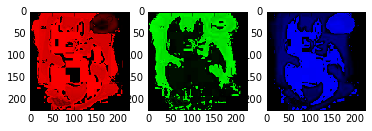

In [303]:
diff = img_rgb[:,:,0] - img_color[:,:,0];#print(diff[90:100, 90:100])
plt.subplot(1,3,1)
red = np.dstack((diff, np.zeros_like(diff), np.zeros_like(diff)))
plt.imshow(red)

diff = img_rgb[:,:,1] - img_color[:,:,1]; #print(diff[90:100, 90:100])
plt.subplot(1,3,2)
green = np.dstack((np.zeros_like(diff), diff, np.zeros_like(diff)))
plt.imshow(green)

diff = img_rgb[:,:,2] - img_color[:,:,2]; #print(diff[90:100, 90:100])
plt.subplot(1,3,3)
blue = np.dstack((np.zeros_like(diff), np.zeros_like(diff), diff))
plt.imshow(blue)

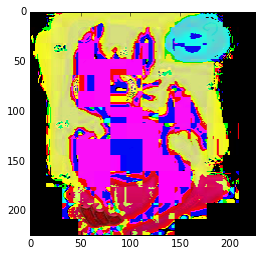

In [304]:
diff = img_rgb - img_color
plt.imshow(diff)

### Gamma Correction

In [305]:
def gamma_correction(img, correction):
    img = img/255.0
    img = cv2.pow(img, correction)
    return np.uint8(img*255)

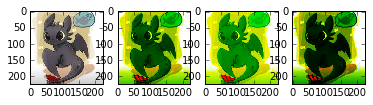

In [306]:
import numpy as np

# scaling factor for each channels
rs = 0.299
gs = 0.587
bs = 0.114

img_color = np.zeros_like(img_rgb)
img_color[:,:,0] = np.floor(np.clip((gamma_correction(np.array(img_rgb[:,:,0]), 2) - 
                                    np.array(img_rgb[:,:,1]) * gs - 
                                    np.array(img_rgb[:,:,2]) * bs) * 1/rs, a_min=0, a_max=255))

img_color[:,:,1] = np.floor(np.clip((gamma_correction(np.array(img_rgb[:,:,1]), 1) - 
                                     np.array(img_rgb[:,:,0]) * rs - 
                                     np.array(img_rgb[:,:,2]) * bs) * 1/gs, a_min=0, a_max=255))

img_color[:,:,2] = np.floor(np.clip((gamma_correction(np.array(img_rgb[:,:,2]), 3) - 
                                     np.array(img_rgb[:,:,0]) * rs - 
                                     np.array(img_rgb[:,:,1]) * gs) * 1/bs, a_min=0, a_max=255))

img_gamma1 = gamma_correction(img_color, 0.5)
img_gamma2 = gamma_correction(img_color, 2)

plt.subplot(1,4,1)
plt.imshow(img_rgb)
plt.subplot(1,4,2)
plt.imshow(img_color)
plt.subplot(1,4,3)
plt.imshow(img_gamma1)
plt.subplot(1,4,4)
plt.imshow(img_gamma2)


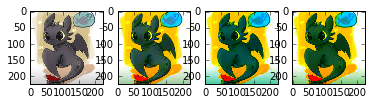

In [307]:
import numpy as np

# scaling factor for each channels
rs = 0.299
gs = 0.587
bs = 0.114

img_color = np.zeros_like(img_rgb)
plt.subplot(1,4,1)
plt.imshow(img_rgb)

img_color[:,:,0] = gamma_correction(np.floor(np.clip((np.array(img_rgb[:,:,0]) - 
                                     np.array(img_rgb[:,:,1]) * gs - 
                                     np.array(img_rgb[:,:,2]) * bs) * 1/rs, a_min=0, a_max=255)), 2)

img_color[:,:,1] = np.floor(np.clip((np.array(img_rgb[:,:,1]) - 
                                     np.array(img_rgb[:,:,0]) * rs - 
                                     np.array(img_rgb[:,:,2]) * bs) * 1/gs, a_min=0, a_max=255))

img_color[:,:,2] = gamma_correction(np.floor(np.clip((np.array(img_rgb[:,:,2]) - 
                                     np.array(img_rgb[:,:,0]) * rs - 
                                     np.array(img_rgb[:,:,1]) * gs) * 1/bs, a_min=0, a_max=255)), 2)


plt.subplot(1,4,2)
plt.imshow(img_color)

img_color[:,:,0] = gamma_correction(np.floor(np.clip((np.array(img_rgb[:,:,0]) - 
                                     np.array(img_rgb[:,:,1]) * gs - 
                                     np.array(img_rgb[:,:,2]) * bs) * 1/rs, a_min=0, a_max=255)), 5)

img_color[:,:,1] = np.floor(np.clip((np.array(img_rgb[:,:,1]) - 
                                     np.array(img_rgb[:,:,0]) * rs - 
                                     np.array(img_rgb[:,:,2]) * bs) * 1/gs, a_min=0, a_max=255))

img_color[:,:,2] = gamma_correction(np.floor(np.clip((np.array(img_rgb[:,:,2]) - 
                                     np.array(img_rgb[:,:,0]) * rs - 
                                     np.array(img_rgb[:,:,1]) * gs) * 1/bs, a_min=0, a_max=255)), 2)

plt.subplot(1,4,3)
plt.imshow(img_color)

img_color[:,:,0] = gamma_correction(np.floor(np.clip((np.array(img_rgb[:,:,0]) - 
                                     np.array(img_rgb[:,:,1]) * gs - 
                                     np.array(img_rgb[:,:,2]) * bs) * 1/rs, a_min=0, a_max=255)), 3)

img_color[:,:,1] = np.floor(np.clip((np.array(img_rgb[:,:,1]) - 
                                     np.array(img_rgb[:,:,0]) * rs - 
                                     np.array(img_rgb[:,:,2]) * bs) * 1/gs, a_min=0, a_max=255))

img_color[:,:,2] = gamma_correction(np.floor(np.clip((np.array(img_rgb[:,:,2]) - 
                                     np.array(img_rgb[:,:,0]) * rs - 
                                     np.array(img_rgb[:,:,1]) * gs) * 1/bs, a_min=0, a_max=255)), 3)

plt.subplot(1,4,4)
plt.imshow(img_color)
